In [1]:
!pip install dask[dataframe]

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install py7zr
!pip install wget

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import py7zr
import os

def unzip(file_path, output_dir):
    with py7zr.SevenZipFile(file_path, mode='r') as z:
        z.extractall(output_dir)
    print(f"{file_path}")

i2m = list(zip(range(1, 13), ['Gener', 'Febrer', 'Marc', 'Abril', 'Maig', 'Juny', 'Juliol', 'Agost', 'Setembre', 'Octubre', 'Novembre', 'Desembre']))
file_directory = 'H:/My Drive/Colab Notebooks/Capstone Project/7z/' 
for year in [2023, 2022, 2021, 2020]:
    for month, month_name in i2m:
        zip_file = os.path.join(file_directory, f'{year}_{month:02d}_{month_name}_BicingNou_ESTACIONS.7z')
        output_directory = 'Files'
        unzip(zip_file, output_directory)

H:/My Drive/Colab Notebooks/Capstone Project/7z/2023_01_Gener_BicingNou_ESTACIONS.7z
H:/My Drive/Colab Notebooks/Capstone Project/7z/2023_02_Febrer_BicingNou_ESTACIONS.7z
H:/My Drive/Colab Notebooks/Capstone Project/7z/2023_03_Marc_BicingNou_ESTACIONS.7z
H:/My Drive/Colab Notebooks/Capstone Project/7z/2023_04_Abril_BicingNou_ESTACIONS.7z
H:/My Drive/Colab Notebooks/Capstone Project/7z/2023_05_Maig_BicingNou_ESTACIONS.7z
H:/My Drive/Colab Notebooks/Capstone Project/7z/2023_06_Juny_BicingNou_ESTACIONS.7z
H:/My Drive/Colab Notebooks/Capstone Project/7z/2023_07_Juliol_BicingNou_ESTACIONS.7z
H:/My Drive/Colab Notebooks/Capstone Project/7z/2023_08_Agost_BicingNou_ESTACIONS.7z
H:/My Drive/Colab Notebooks/Capstone Project/7z/2023_09_Setembre_BicingNou_ESTACIONS.7z
H:/My Drive/Colab Notebooks/Capstone Project/7z/2023_10_Octubre_BicingNou_ESTACIONS.7z
H:/My Drive/Colab Notebooks/Capstone Project/7z/2023_11_Novembre_BicingNou_ESTACIONS.7z
H:/My Drive/Colab Notebooks/Capstone Project/7z/2023_12_De

In [4]:
import dask.dataframe as dd
import pandas as pd

# **1 - Year 2020**

In [5]:
ddf_2020 = dd.read_csv('Files/2020*.csv', assume_missing=True, dtype={
    'last_reported': 'float64',
    'last_updated': 'float64',
    'is_installed': 'float64',
    'is_returning': 'object',
    'is_renting': 'object',
    'ttl': 'float64',
    'num_bikes_available': 'float64',
    'num_bikes_available_types.ebike': 'float64',
    'num_bikes_available_types.mechanical': 'float64',
    'num_docks_available': 'float64',
    'station_id': 'float64',
}, low_memory=False)

ddf_2020['date'] = dd.to_datetime(ddf_2020.last_reported, unit='s')
ddf_2020['month'] = ddf_2020['date'].dt.month
ddf_2020['day'] = ddf_2020['date'].dt.day
ddf_2020['year'] = ddf_2020['date'].dt.year
ddf_2020['hour'] = ddf_2020['date'].dt.hour

In [6]:
ddf_2020.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,last_reported,is_charging_station,status,last_updated,ttl,date,month,day,year,hour
0,1.0,21.0,21.0,0.0,23.0,1.0,1,1,1.577833e+09,True,IN_SERVICE,1.577833e+09,28.0,2019-12-31 22:56:44,12,31,2019,22
1,2.0,10.0,9.0,1.0,16.0,1.0,1,1,1.577833e+09,True,IN_SERVICE,1.577833e+09,28.0,2019-12-31 22:57:58,12,31,2019,22
2,3.0,15.0,15.0,0.0,9.0,1.0,1,1,1.577833e+09,True,IN_SERVICE,1.577833e+09,28.0,2019-12-31 22:56:20,12,31,2019,22
3,4.0,8.0,8.0,0.0,13.0,1.0,1,1,1.577833e+09,True,IN_SERVICE,1.577833e+09,28.0,2019-12-31 22:58:50,12,31,2019,22
4,5.0,14.0,11.0,3.0,24.0,1.0,1,1,1.577833e+09,True,IN_SERVICE,1.577833e+09,28.0,2019-12-31 22:58:50,12,31,2019,22


In [7]:
ddf_2020.describe()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,last_reported,last_updated,ttl,month,day,year,hour
npartitions=1,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...


In [8]:
ddf_2020.tail()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,last_reported,is_charging_station,status,last_updated,ttl,date,month,day,year,hour
1104048,515.0,11.0,10.0,1.0,11.0,1.609455e+09,TRUE,IN_SERVICE,1.0,True,1,1.609455e+09,26.0,1970-01-01 00:00:01,1,1,1970,0
1104049,516.0,18.0,18.0,0.0,3.0,1.609455e+09,TRUE,IN_SERVICE,1.0,True,1,1.609455e+09,26.0,1970-01-01 00:00:01,1,1,1970,0
1104050,517.0,18.0,17.0,1.0,5.0,1.609455e+09,TRUE,IN_SERVICE,1.0,True,1,1.609455e+09,26.0,1970-01-01 00:00:01,1,1,1970,0
1104051,518.0,6.0,0.0,6.0,20.0,1.609455e+09,TRUE,IN_SERVICE,1.0,True,1,1.609455e+09,26.0,1970-01-01 00:00:01,1,1,1970,0
1104052,519.0,2.0,0.0,2.0,22.0,1.609455e+09,TRUE,IN_SERVICE,1.0,True,1,1.609455e+09,26.0,1970-01-01 00:00:01,1,1,1970,0


In [9]:
ddf_2020 = ddf_2020[ddf_2020.year != 2019]

In [10]:
ddf_2020 = ddf_2020[ddf_2020.year != 1970]

In [11]:
ddf_2020 = ddf_2020[ddf_2020.status == 'IN_SERVICE']

In [12]:
ddf_2020 = ddf_2020[ddf_2020.num_bikes_available < 90]

In [13]:
ddf_2020.dtypes

station_id                                     float64
num_bikes_available                            float64
num_bikes_available_types.mechanical           float64
num_bikes_available_types.ebike                float64
num_docks_available                            float64
is_installed                                   float64
is_renting                                      object
is_returning                                    object
last_reported                                  float64
is_charging_station                               bool
status                                          object
last_updated                                   float64
ttl                                            float64
date                                    datetime64[ns]
month                                            int64
day                                              int64
year                                             int64
hour                                             int64
dtype: obj

In [14]:
ddf_2020['is_renting'] = ddf_2020['is_renting'].astype('float64')
ddf_2020['is_returning'] = ddf_2020['is_returning'].astype('float64')

In [15]:
ddf_2020 = ddf_2020[['station_id','num_bikes_available','num_docks_available', 'year','date','month', 'day', 'hour']]

In [16]:
ddf_2020.tail()

,station_id,num_bikes_available,num_docks_available,year,date,month,day,hour


In [17]:
ddf_2020['year'] = ddf_2020['year'].astype('float64')
ddf_2020['month'] = ddf_2020['month'].astype('float64')
ddf_2020['day'] = ddf_2020['day'].astype('float64')
ddf_2020['hour'] = ddf_2020['hour'].astype('float64')

In [18]:
ddf_2020.head()

,station_id,num_bikes_available,num_docks_available,year,date,month,day,hour
4939,22.0,1.0,17.0,2020.0,2020-01-01 00:00:00,1.0,1.0,0.0
4961,46.0,35.0,17.0,2020.0,2020-01-01 00:00:02,1.0,1.0,0.0
4967,53.0,8.0,12.0,2020.0,2020-01-01 00:00:06,1.0,1.0,0.0
4968,54.0,16.0,2.0,2020.0,2020-01-01 00:00:05,1.0,1.0,0.0
5007,95.0,27.0,6.0,2020.0,2020-01-01 00:00:00,1.0,1.0,0.0


In [19]:
df_2020 = ddf_2020.compute()

In [20]:
df_2020

,station_id,num_bikes_available,num_docks_available,year,date,month,day,hour
4939,22.0,1.0,17.0,2020.0,2020-01-01 00:00:00,1.0,1.0,0.0
4961,46.0,35.0,17.0,2020.0,2020-01-01 00:00:02,1.0,1.0,0.0
4967,53.0,8.0,12.0,2020.0,2020-01-01 00:00:06,1.0,1.0,0.0
4968,54.0,16.0,2.0,2020.0,2020-01-01 00:00:05,1.0,1.0,0.0
5007,95.0,27.0,6.0,2020.0,2020-01-01 00:00:00,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1104990,143.0,16.0,10.0,2020.0,2020-12-08 13:54:13,12.0,8.0,13.0
1104991,144.0,9.0,17.0,2020.0,2020-12-08 13:52:38,12.0,8.0,13.0
1104992,145.0,19.0,6.0,2020.0,2020-12-08 13:54:25,12.0,8.0,13.0
1104993,146.0,20.0,4.0,2020.0,2020-12-08 13:52:27,12.0,8.0,13.0


In [76]:
df_2020.dtypes

station_id                    float64
num_bikes_available           float64
num_docks_available           float64
year                          float64
date                   datetime64[ns]
month                         float64
day                           float64
hour                          float64
dtype: object

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

**Disponibilidad de bicicletas Antes, Durante, y Despues del confinamiento el 2020**

In [79]:
meses = ['Ene', 'Feb', 'Marz', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Dic']

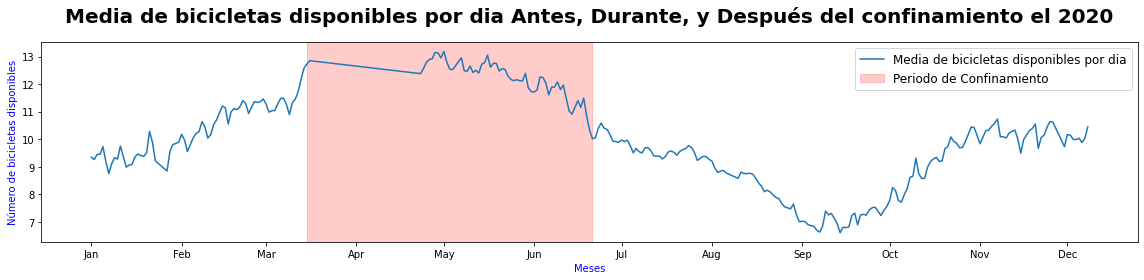

In [133]:
lockdown_start = pd.Timestamp(2020, 3, 15)
lockdown_end = pd.Timestamp(2020, 6, 21)

# Muestra de la frecuencia diaria y calcular la media
df_daily = df_2020.set_index('date').resample('D').mean().reset_index()

# Plotting
plt.figure(figsize=(16, 4))
sns.lineplot(x='date', y='num_bikes_available', data=df_daily, ci=None, label='Media de bicicletas disponibles por dia')

# Marcar el periodo de confinamiento
plt.axvspan(lockdown_start, lockdown_end, color='red', alpha=0.2, label='Periodo de Confinamiento')

# Formar el x-axis y mostrar los meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Media de bicicletas disponibles por dia Antes, Durante, y Después del confinamiento el 2020', fontsize=20, color='black', weight='bold' , pad=20)
plt.xlabel('Meses', color='blue')
plt.ylabel('Número de bicicletas disponibles', color='blue')
plt.legend(fontsize='large')
plt.tight_layout()
plt.show()

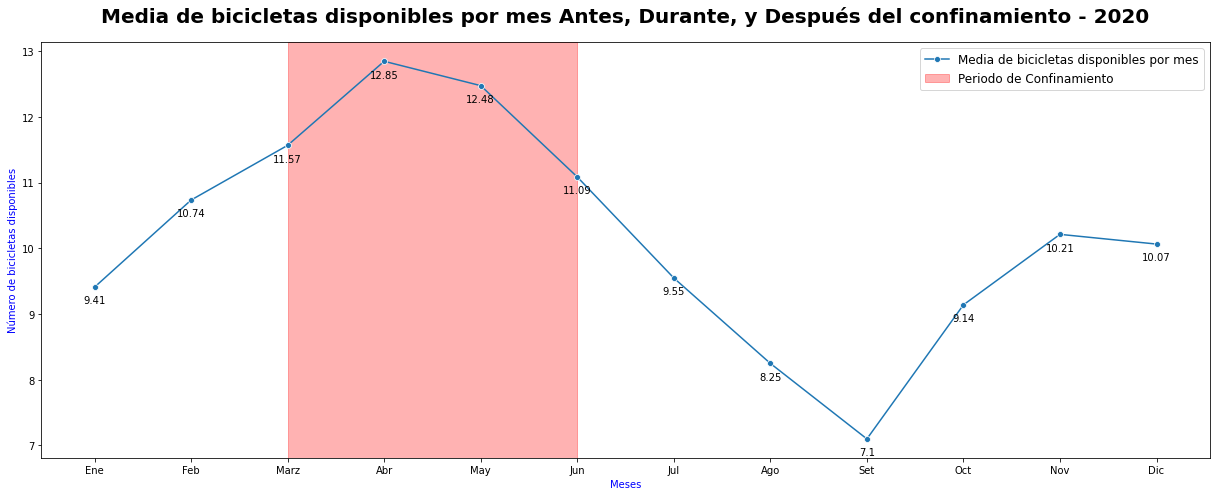

In [155]:
# Calcular la disponibilidad media de bicicletas al mes
average_bikes_per_month = df_2020.groupby('month')['num_bikes_available'].mean()

# Plotting 
plt.figure(figsize=(17, 7))

# Plot de la disponibilidad media mensual
sns.lineplot(x=average_bikes_per_month.index, y=average_bikes_per_month.values, marker='o', label='Media de bicicletas disponibles por mes')

# Annotate values for each point
for i, value in enumerate(average_bikes_per_month.values):
    plt.text(average_bikes_per_month.index[i], value- 0.13, round(value, 2), ha='center', va='top', fontsize=10)

# Remarcar los meses del confinamiento para España
plt.axvspan(3, 6, color='red', alpha=0.3, label='Periodo de Confinamiento')

# Personalizar el plot
plt.title('Media de bicicletas disponibles por mes Antes, Durante, y Después del confinamiento - 2020', fontsize=20, color='black', weight='bold' , pad=20)
plt.xlabel('Meses', color='blue')
plt.ylabel('Número de bicicletas disponibles', color='blue')
plt.xticks(range(1, 13), meses)

# Mostrar leyenda
plt.legend(fontsize='large')

# Mostrar plot
plt.tight_layout()
plt.show()

**Heatmap de disponibilidad de bicicletas por meses y horas del dia para el año 2020**

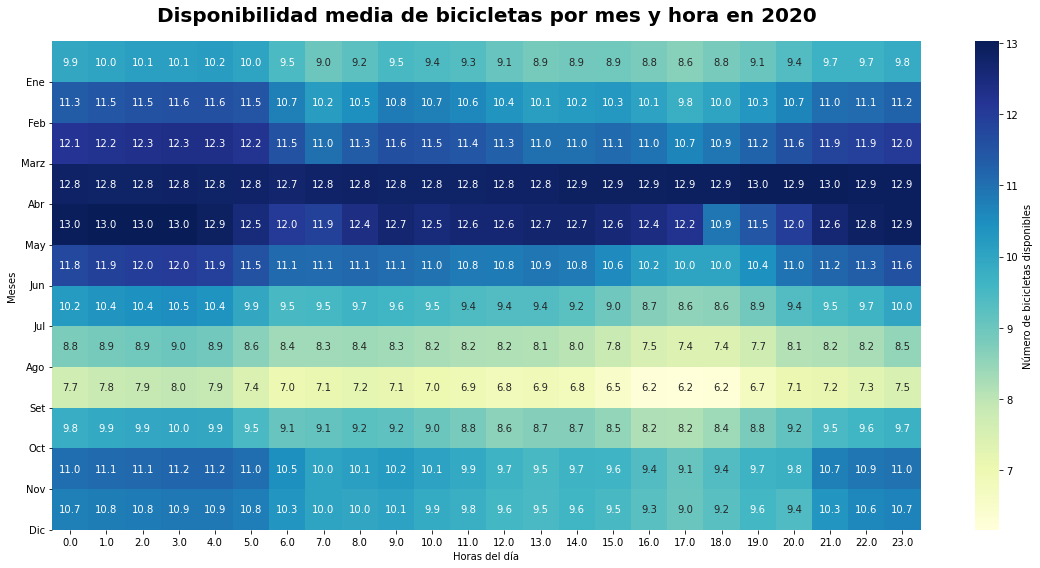

In [135]:
pivot_df = df_2020.pivot_table(index='month', columns='hour', values='num_bikes_available', aggfunc='mean')

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Número de bicicletas disponibles'})
plt.title('Disponibilidad media de bicicletas por mes y hora en 2020', fontsize=20, color='black', weight='bold' , pad=20)
plt.xlabel('Horas del día')
plt.ylabel('Meses')

plt.yticks(ticks=np.arange(1, 13), labels=meses, rotation=0)
plt.tight_layout()
plt.show()

# **2 - Year 2021**

In [21]:
ddf_2021 = dd.read_csv('Files/2021*.csv', assume_missing=True, dtype={
    'last_reported': 'float64',
    'last_updated': 'float64',
    'is_installed': 'float64',
    'is_returning': 'object',
    'is_renting': 'object',
    'ttl': 'float64',
    'num_bikes_available': 'float64',
    'num_bikes_available_types.ebike': 'float64',
    'num_bikes_available_types.mechanical': 'float64',
    'num_docks_available': 'float64',
    'station_id': 'float64',
}, low_memory=False)

ddf_2021['date'] = dd.to_datetime(ddf_2021.last_reported, unit='s')
ddf_2021['month'] = ddf_2021['date'].dt.month
ddf_2021['day'] = ddf_2021['date'].dt.day
ddf_2021['year'] = ddf_2021['date'].dt.year
ddf_2021['hour'] = ddf_2021['date'].dt.hour

In [22]:
ddf_2021.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,last_updated,ttl,date,month,day,year,hour
0,1.0,43.0,43.0,0.0,3.0,1.609455e+09,True,IN_SERVICE,1.0,1,1,1.609456e+09,22.0,2020-12-31 22:56:46,12,31,2020,22
1,2.0,17.0,15.0,2.0,10.0,1.609455e+09,True,IN_SERVICE,1.0,1,1,1.609456e+09,22.0,2020-12-31 22:57:51,12,31,2020,22
2,3.0,3.0,3.0,0.0,22.0,1.609455e+09,True,IN_SERVICE,1.0,1,1,1.609456e+09,22.0,2020-12-31 22:56:48,12,31,2020,22
3,4.0,15.0,14.0,1.0,6.0,1.609455e+09,True,IN_SERVICE,1.0,1,1,1.609456e+09,22.0,2020-12-31 22:57:38,12,31,2020,22
4,5.0,8.0,8.0,0.0,31.0,1.609455e+09,True,IN_SERVICE,1.0,1,1,1.609456e+09,22.0,2020-12-31 22:57:21,12,31,2020,22


In [23]:
ddf_2021.tail()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,last_updated,ttl,date,month,day,year,hour
515,1.0,1.0,0.0,22.0,1.640992e+09,1.0,True,1,1.0,1,NaN,1.640992e+09,23.0,1970-01-01 00:00:01,1,1,1970,0
516,10.0,7.0,3.0,10.0,1.640992e+09,1.0,True,1,1.0,1,NaN,1.640992e+09,23.0,1970-01-01 00:00:01,1,1,1970,0
517,3.0,1.0,2.0,17.0,1.640992e+09,1.0,True,1,1.0,1,NaN,1.640992e+09,23.0,1970-01-01 00:00:01,1,1,1970,0
518,6.0,2.0,4.0,21.0,1.640992e+09,1.0,True,1,1.0,1,NaN,1.640992e+09,23.0,1970-01-01 00:00:01,1,1,1970,0
519,1.0,0.0,1.0,23.0,1.640992e+09,1.0,True,1,1.0,1,NaN,1.640992e+09,23.0,1970-01-01 00:00:01,1,1,1970,0


In [24]:
ddf_2021 = ddf_2021[ddf_2021.year != 2020]

In [25]:
ddf_2021 = ddf_2021[ddf_2021.year != 1970]

In [26]:
ddf_2021 = ddf_2021[ddf_2021.status == 'IN_SERVICE']

In [27]:
ddf_2021 = ddf_2021[ddf_2021.num_bikes_available < 90]

In [28]:
ddf_2021.dtypes

station_id                                     float64
num_bikes_available                            float64
num_bikes_available_types.mechanical           float64
num_bikes_available_types.ebike                float64
num_docks_available                            float64
last_reported                                  float64
is_charging_station                               bool
status                                          object
is_installed                                   float64
is_renting                                      object
is_returning                                    object
last_updated                                   float64
ttl                                            float64
date                                    datetime64[ns]
month                                            int64
day                                              int64
year                                             int64
hour                                             int64
dtype: obj

In [29]:
ddf_2021['is_renting'] = ddf_2021['is_renting'].astype('float64')
ddf_2021['is_returning'] = ddf_2021['is_returning'].astype('float64')

In [30]:
ddf_2021.dtypes

station_id                                     float64
num_bikes_available                            float64
num_bikes_available_types.mechanical           float64
num_bikes_available_types.ebike                float64
num_docks_available                            float64
last_reported                                  float64
is_charging_station                               bool
status                                          object
is_installed                                   float64
is_renting                                     float64
is_returning                                   float64
last_updated                                   float64
ttl                                            float64
date                                    datetime64[ns]
month                                            int64
day                                              int64
year                                             int64
hour                                             int64
dtype: obj

In [31]:
ddf_2021 = ddf_2021[['station_id','num_bikes_available','num_docks_available', 'year','date','month', 'day', 'hour']]

In [32]:
ddf_2021['year'] = ddf_2021['year'].astype('float64')
ddf_2021['month'] = ddf_2021['month'].astype('float64')
ddf_2021['day'] = ddf_2021['day'].astype('float64')
ddf_2021['hour'] = ddf_2021['hour'].astype('float64')

In [33]:
ddf_2021.head()

,station_id,num_bikes_available,num_docks_available,year,date,month,day,hour
6061,2.0,14.0,13.0,2021.0,2021-01-01 00:00:01,1.0,1.0,0.0
6074,15.0,25.0,2.0,2021.0,2021-01-01 00:00:19,1.0,1.0,0.0
6079,21.0,3.0,15.0,2021.0,2021-01-01 00:00:30,1.0,1.0,0.0
6080,22.0,2.0,17.0,2021.0,2021-01-01 00:00:20,1.0,1.0,0.0
6089,31.0,15.0,1.0,2021.0,2021-01-01 00:00:26,1.0,1.0,0.0


In [34]:
ddf_2021.tail()

,station_id,num_bikes_available,num_docks_available,year,date,month,day,hour


In [35]:
df_2021 = ddf_2021.compute()

In [36]:
df_2021

,station_id,num_bikes_available,num_docks_available,year,date,month,day,hour
6061,2.0,14.0,13.0,2021.0,2021-01-01 00:00:01,1.0,1.0,0.0
6074,15.0,25.0,2.0,2021.0,2021-01-01 00:00:19,1.0,1.0,0.0
6079,21.0,3.0,15.0,2021.0,2021-01-01 00:00:30,1.0,1.0,0.0
6080,22.0,2.0,17.0,2021.0,2021-01-01 00:00:20,1.0,1.0,0.0
6089,31.0,15.0,1.0,2021.0,2021-01-01 00:00:26,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1092392,490.0,20.0,29.0,2021.0,2021-12-09 05:42:10,12.0,9.0,5.0
1092393,491.0,16.0,11.0,2021.0,2021-12-09 05:42:32,12.0,9.0,5.0
1092394,492.0,12.0,8.0,2021.0,2021-12-09 05:43:51,12.0,9.0,5.0
1092395,493.0,3.0,20.0,2021.0,2021-12-09 05:43:12,12.0,9.0,5.0


In [37]:
df_2021.dtypes

station_id                    float64
num_bikes_available           float64
num_docks_available           float64
year                          float64
date                   datetime64[ns]
month                         float64
day                           float64
hour                          float64
dtype: object

**Disponibilidad de bicicletas por meses para los años 2020 y 2021**

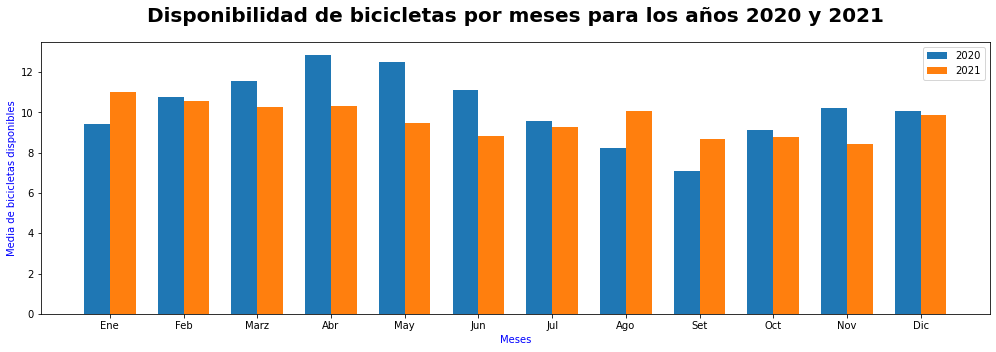

In [180]:
# Agregar datso por mes para ambos años
df_2020['date'] = pd.to_datetime(df_2020[['year', 'month', 'day', 'hour']])
df_2021['date'] = pd.to_datetime(df_2021['date'])

df_2020_monthly = df_2020.groupby(['year', 'month']).mean().reset_index()
df_2021_monthly = df_2021.groupby(['year', 'month']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(17, 5))
width = 0.35 

months = range(1, 13)
avg_bikes_2020 = df_2020_monthly['num_bikes_available']
avg_bikes_2021 = df_2021_monthly['num_bikes_available']

# Crear barras
ax.bar([m - width/2 for m in months], avg_bikes_2020, width, label='2020')
ax.bar([m + width/2 for m in months], avg_bikes_2021, width, label='2021')

# Agregar titulos y etiquetas
ax.set_title('Disponibilidad de bicicletas por meses para los años 2020 y 2021', fontsize=20, color='black', weight='bold' , pad=20)
ax.set_xlabel('Meses', color='blue')
ax.set_ylabel('Media de bicicletas disponibles', color='blue')
ax.legend()

# Improve tick labels for months
ax.set_xticks(months)
ax.set_xticklabels(meses)

plt.show()

# **3 - Year 2022**

In [38]:
ddf_2022 = dd.read_csv('Files/2022*.csv', assume_missing=True, dtype={
    'last_reported': 'float64',
    'last_updated': 'float64',
    'is_installed': 'float64',
    'is_returning': 'object',
    'is_renting': 'object',
    'ttl': 'float64',
    'num_bikes_available': 'float64',
    'num_bikes_available_types.ebike': 'float64',
    'num_bikes_available_types.mechanical': 'float64',
    'num_docks_available': 'float64',
    'station_id': 'float64',
}, low_memory=False)

ddf_2022['date'] = dd.to_datetime(ddf_2022.last_reported, unit='s')
ddf_2022['month'] = ddf_2022['date'].dt.month
ddf_2022['day'] = ddf_2022['date'].dt.day
ddf_2022['year'] = ddf_2022['date'].dt.year 
ddf_2022['hour'] = ddf_2022['date'].dt.hour

In [39]:
ddf_2022.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,last_updated,ttl,date,month,day,year,hour
0,1.0,18.0,12.0,6.0,28.0,1.640992e+09,True,IN_SERVICE,1.0,1,1,NaN,1.640992e+09,18.0,2021-12-31 22:58:25,12,31,2021,22
1,2.0,18.0,15.0,3.0,11.0,1.640991e+09,True,IN_SERVICE,1.0,1,1,NaN,1.640992e+09,18.0,2021-12-31 22:56:33,12,31,2021,22
2,3.0,12.0,12.0,0.0,15.0,1.640992e+09,True,IN_SERVICE,1.0,1,1,NaN,1.640992e+09,18.0,2021-12-31 22:59:11,12,31,2021,22
3,4.0,2.0,1.0,1.0,18.0,1.640991e+09,True,IN_SERVICE,1.0,1,1,NaN,1.640992e+09,18.0,2021-12-31 22:57:33,12,31,2021,22
4,5.0,6.0,4.0,2.0,33.0,1.640991e+09,True,IN_SERVICE,1.0,1,1,NaN,1.640992e+09,18.0,2021-12-31 22:56:34,12,31,2021,22


In [40]:
ddf_2022.tail()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,last_updated,ttl,date,month,day,year,hour
1128523,515.0,9.0,4.0,5.0,15.0,1.672528e+09,True,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0,2022-12-31 23:12:29,12,31,2022,23
1128524,516.0,7.0,6.0,1.0,14.0,1.672528e+09,True,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0,2022-12-31 23:11:34,12,31,2022,23
1128525,517.0,13.0,0.0,13.0,7.0,1.672528e+09,True,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0,2022-12-31 23:12:28,12,31,2022,23
1128526,518.0,2.0,0.0,2.0,25.0,1.672528e+09,True,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0,2022-12-31 23:14:35,12,31,2022,23
1128527,519.0,11.0,0.0,11.0,13.0,1.672528e+09,True,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0,2022-12-31 23:10:30,12,31,2022,23


In [41]:
ddf_2022 = ddf_2022.drop(columns=['traffic'])

In [42]:
ddf_2022 = ddf_2022[ddf_2022.year != 2021]

In [45]:
ddf_2022 = ddf_2022[ddf_2022.status == 'IN_SERVICE']

In [46]:
ddf_2022 = ddf_2022[ddf_2022.num_bikes_available < 90]

In [47]:
ddf_2022['is_renting'] = ddf_2022['is_renting'].astype('float64')
ddf_2022['is_returning'] = ddf_2022['is_returning'].astype('float64')

In [48]:
ddf_2022 = ddf_2022[['station_id','num_bikes_available','num_docks_available', 'year','date','month', 'day', 'hour']]

In [49]:
ddf_2022['year'] = ddf_2022['year'].astype('float64')
ddf_2022['month'] = ddf_2022['month'].astype('float64')
ddf_2022['day'] = ddf_2022['day'].astype('float64')
ddf_2022['hour'] = ddf_2022['hour'].astype('float64')

In [50]:
ddf_2022.head()

,station_id,num_bikes_available,num_docks_available,year,date,month,day,hour
6604,1.0,16.0,30.0,2022.0,2022-01-01 00:00:41,1.0,1.0,0.0
6605,2.0,18.0,11.0,2022.0,2022-01-01 00:03:21,1.0,1.0,0.0
6606,3.0,5.0,22.0,2022.0,2022-01-01 00:01:17,1.0,1.0,0.0
6607,4.0,3.0,17.0,2022.0,2022-01-01 00:02:17,1.0,1.0,0.0
6608,5.0,5.0,34.0,2022.0,2022-01-01 00:02:39,1.0,1.0,0.0


In [51]:
ddf_2022.tail()

,station_id,num_bikes_available,num_docks_available,year,date,month,day,hour
1128523,515.0,9.0,15.0,2022.0,2022-12-31 23:12:29,12.0,31.0,23.0
1128524,516.0,7.0,14.0,2022.0,2022-12-31 23:11:34,12.0,31.0,23.0
1128525,517.0,13.0,7.0,2022.0,2022-12-31 23:12:28,12.0,31.0,23.0
1128526,518.0,2.0,25.0,2022.0,2022-12-31 23:14:35,12.0,31.0,23.0
1128527,519.0,11.0,13.0,2022.0,2022-12-31 23:10:30,12.0,31.0,23.0


In [52]:
df_2022 = ddf_2022.compute()

In [53]:
df_2022

,station_id,num_bikes_available,num_docks_available,year,date,month,day,hour
6604,1.0,16.0,30.0,2022.0,2022-01-01 00:00:41,1.0,1.0,0.0
6605,2.0,18.0,11.0,2022.0,2022-01-01 00:03:21,1.0,1.0,0.0
6606,3.0,5.0,22.0,2022.0,2022-01-01 00:01:17,1.0,1.0,0.0
6607,4.0,3.0,17.0,2022.0,2022-01-01 00:02:17,1.0,1.0,0.0
6608,5.0,5.0,34.0,2022.0,2022-01-01 00:02:39,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1128523,515.0,9.0,15.0,2022.0,2022-12-31 23:12:29,12.0,31.0,23.0
1128524,516.0,7.0,14.0,2022.0,2022-12-31 23:11:34,12.0,31.0,23.0
1128525,517.0,13.0,7.0,2022.0,2022-12-31 23:12:28,12.0,31.0,23.0
1128526,518.0,2.0,25.0,2022.0,2022-12-31 23:14:35,12.0,31.0,23.0


In [54]:
df_2022.dtypes

station_id                    float64
num_bikes_available           float64
num_docks_available           float64
year                          float64
date                   datetime64[ns]
month                         float64
day                           float64
hour                          float64
dtype: object

# **4 -Year 2023**

In [55]:
dtypes = {
    'status': 'object',
    'last_reported': 'float64',
    'last_updated': 'float64',
    'is_installed': 'float64',
    'is_returning': 'object',
    'is_renting': 'object',
    'ttl': 'float64',
    'num_bikes_available': 'float64',
    'num_bikes_available_types.ebike': 'float64',
    'num_bikes_available_types.mechanical': 'float64',
    'num_docks_available': 'float64',
    'station_id': 'float64',
}

In [56]:
ddf_08 = dd.read_csv('Files/2023_08_Agost_BicingNou_ESTACIONS.csv', assume_missing=True, dtype=dtypes, low_memory=False).drop(columns=['V1'])
ddf_09 = dd.read_csv('Files/2023_09_Setembre_BicingNou_ESTACIONS.csv', assume_missing=True, dtype=dtypes, low_memory=False).drop(columns=['V1'])

In [57]:
ddf_08.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,last_updated,ttl
0,1.0,30.0,28.0,2.0,14.0,1.690841e+09,True,IN_SERVICE,1.0,1,1,NaN,1.690841e+09,16.0
1,2.0,14.0,14.0,0.0,11.0,1.690841e+09,True,IN_SERVICE,1.0,1,1,NaN,1.690841e+09,16.0
2,3.0,8.0,7.0,1.0,18.0,1.690841e+09,True,IN_SERVICE,1.0,1,1,NaN,1.690841e+09,16.0
3,4.0,7.0,7.0,0.0,9.0,1.690841e+09,True,IN_SERVICE,1.0,1,1,NaN,1.690841e+09,16.0
4,5.0,11.0,11.0,0.0,27.0,1.690841e+09,True,IN_SERVICE,1.0,1,1,NaN,1.690841e+09,16.0


In [58]:
ddf_09.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,last_updated,ttl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
import glob

# Get all files matching the pattern
all_files = glob.glob('Files/2023*.csv')

# Exclude the specific files
excluded_files = ['Files/2023_09_Setembre_BicingNou_ESTACIONS.csv', 'Files/2023_08_Agost_BicingNou_ESTACIONS.csv']
filtered_files = [file for file in all_files if file not in excluded_files]

# Read the filtered list of files with the specified dtypes
ddf_pre_2023 = dd.read_csv(filtered_files, assume_missing=True, dtype=dtypes, low_memory=False)

# Drop 'V1' column from the pre-2023 DataFrame if it exists
if 'V1' in ddf_pre_2023.columns:
    ddf_pre_2023 = ddf_pre_2023.drop(columns=['V1'])

# Ensure all DataFrames have the same columns
common_columns = ddf_pre_2023.columns.intersection(ddf_08.columns).intersection(ddf_09.columns)
ddf_pre_2023 = ddf_pre_2023[common_columns]
ddf_08 = ddf_08[common_columns]
ddf_09 = ddf_09[common_columns]

In [60]:
ddf_2023 = dd.concat([ddf_pre_2023, ddf_08, ddf_09])

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\backends.py:501: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  out = pd.concat(dfs3, join=join, sort=False)


In [61]:
ddf_2023.head(2000)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,last_updated,ttl
0,1.0,38.0,35.0,3.0,8.0,1.672528e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0
1,2.0,6.0,5.0,1.0,23.0,1.672527e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0
2,3.0,20.0,20.0,0.0,7.0,1.672527e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0
3,4.0,19.0,19.0,0.0,2.0,1.672528e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0
4,5.0,4.0,3.0,1.0,35.0,1.672527e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,491.0,3.0,0.0,3.0,24.0,1.672528e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0
1996,492.0,22.0,22.0,0.0,1.0,1.672528e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0
1997,493.0,6.0,0.0,6.0,18.0,1.672528e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0
1998,494.0,10.0,7.0,3.0,14.0,1.672528e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.672528e+09,19.0


In [62]:
ddf_2023.tail(100000)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,last_updated,ttl
1144972,281.0,19.0,0.0,19.0,4.0,1.696053e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.696053e+09,3.0
1144973,282.0,3.0,0.0,3.0,23.0,1.696053e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.696053e+09,3.0
1144974,283.0,3.0,0.0,3.0,17.0,1.696053e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.696053e+09,3.0
1144975,284.0,1.0,0.0,1.0,24.0,1.696053e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.696053e+09,3.0
1144976,285.0,8.0,2.0,6.0,6.0,1.696053e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.696053e+09,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244967,515.0,3.0,3.0,0.0,20.0,1.696112e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.696112e+09,11.0
1244968,516.0,10.0,10.0,0.0,10.0,1.696112e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.696112e+09,11.0
1244969,517.0,7.0,5.0,2.0,12.0,1.696112e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.696112e+09,11.0
1244970,518.0,2.0,0.0,2.0,24.0,1.696112e+09,1.0,IN_SERVICE,1.0,1,1,NaN,1.696112e+09,11.0


In [63]:
ddf_2023['date'] = dd.to_datetime(ddf_2023.last_reported, unit='s')
ddf_2023['month'] = ddf_2023['date'].dt.month
ddf_2023['day'] = ddf_2023['date'].dt.day
ddf_2023['year'] = ddf_2023['date'].dt.year
ddf_2023['hour'] = ddf_2023['date'].dt.hour

In [65]:
ddf_2023 = ddf_2023.drop(columns=['traffic'])

In [66]:
ddf_2023 = ddf_2023[ddf_2023.year != 2022]

In [67]:
ddf_2023 = ddf_2023[ddf_2023.num_bikes_available < 90]

In [68]:
ddf_2023 = ddf_2023[ddf_2023.status == 'IN_SERVICE']

In [69]:
ddf_2023['is_renting'] = ddf_2023['is_renting'].astype('float64')
ddf_2023['is_returning'] = ddf_2023['is_returning'].astype('float64')

In [70]:
ddf_2023 = ddf_2023[['station_id','num_bikes_available','num_docks_available', 'year','date','month', 'day', 'hour']]

In [71]:
ddf_2023.dtypes

station_id                    float64
num_bikes_available           float64
num_docks_available           float64
year                            int64
date                   datetime64[ns]
month                           int64
day                             int64
hour                            int64
dtype: object

In [72]:
ddf_2023['year'] = ddf_2023['year'].astype('float64')
ddf_2023['month'] = ddf_2023['month'].astype('float64')
ddf_2023['day'] = ddf_2023['day'].astype('float64')
ddf_2023['hour'] = ddf_2023['hour'].astype('float64')

In [73]:
ddf_2023.head()

,station_id,num_bikes_available,num_docks_available,year,date,month,day,hour
6578,1.0,37.0,9.0,2023.0,2023-01-01 00:01:53,1.0,1.0,0.0
6579,2.0,6.0,23.0,2023.0,2023-01-01 00:02:07,1.0,1.0,0.0
6580,3.0,23.0,4.0,2023.0,2023-01-01 00:04:26,1.0,1.0,0.0
6581,4.0,20.0,1.0,2023.0,2023-01-01 00:03:26,1.0,1.0,0.0
6582,5.0,4.0,35.0,2023.0,2023-01-01 00:01:01,1.0,1.0,0.0


In [74]:
df_2023 = ddf_2023.compute()

In [75]:
df_2023

,station_id,num_bikes_available,num_docks_available,year,date,month,day,hour
6578.0,1.0,37.0,9.0,2023.0,2023-01-01 00:01:53,1.0,1.0,0.0
6579.0,2.0,6.0,23.0,2023.0,2023-01-01 00:02:07,1.0,1.0,0.0
6580.0,3.0,23.0,4.0,2023.0,2023-01-01 00:04:26,1.0,1.0,0.0
6581.0,4.0,20.0,1.0,2023.0,2023-01-01 00:03:26,1.0,1.0,0.0
6582.0,5.0,4.0,35.0,2023.0,2023-01-01 00:01:01,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1244967.0,515.0,3.0,20.0,2023.0,2023-09-30 22:11:02,9.0,30.0,22.0
1244968.0,516.0,10.0,10.0,2023.0,2023-09-30 22:13:30,9.0,30.0,22.0
1244969.0,517.0,7.0,12.0,2023.0,2023-09-30 22:13:42,9.0,30.0,22.0
1244970.0,518.0,2.0,24.0,2023.0,2023-09-30 22:11:54,9.0,30.0,22.0


In [76]:
df_2023.dtypes

station_id                    float64
num_bikes_available           float64
num_docks_available           float64
year                          float64
date                   datetime64[ns]
month                         float64
day                           float64
hour                          float64
dtype: object

**Disponibilidad de bicicletas por meses para los años 2020 - 2023**

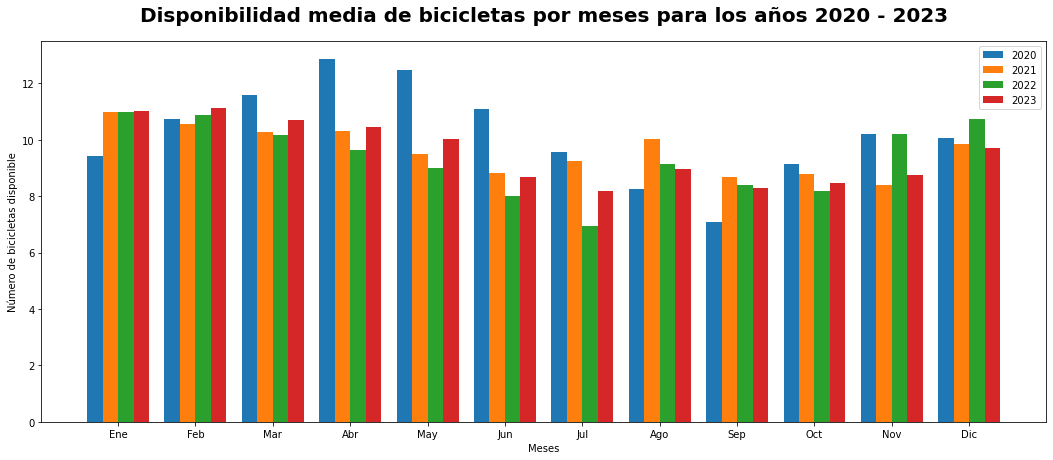

In [90]:
# Function to aggregate data by month for each year
def aggregate_monthly(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    return df.groupby(['year', 'month']).mean().reset_index()

# Aggregate data by month for each year
df_2020_monthly = aggregate_monthly(df_2020)
df_2021_monthly = aggregate_monthly(df_2021)
df_2022_monthly = aggregate_monthly(df_2022)
df_2023_monthly = aggregate_monthly(df_2023)

# Ensure all dataframes have the same shape by including all months
def ensure_all_months(df, year):
    all_months = pd.DataFrame({'month': range(1, 13)})
    df = df[df['year'] == year]
    df = all_months.merge(df, on='month', how='left')
    df['year'] = year
    return df

df_2020_monthly = ensure_all_months(df_2020_monthly, 2020)
df_2021_monthly = ensure_all_months(df_2021_monthly, 2021)
df_2022_monthly = ensure_all_months(df_2022_monthly, 2022)
df_2023_monthly = ensure_all_months(df_2023_monthly, 2023)

# Plotting
fig, ax = plt.subplots(figsize=(18, 7))

width = 0.2  # the width of the bars

months = range(1, 13)  # assuming data for all 12 months
avg_bikes_2020 = df_2020_monthly['num_bikes_available']
avg_bikes_2021 = df_2021_monthly['num_bikes_available']
avg_bikes_2022 = df_2022_monthly['num_bikes_available']
avg_bikes_2023 = df_2023_monthly['num_bikes_available']

# Create bar plots
ax.bar([m - 1.5 * width for m in months], avg_bikes_2020, width, label='2020')
ax.bar([m - 0.5 * width for m in months], avg_bikes_2021, width, label='2021')
ax.bar([m + 0.5 * width for m in months], avg_bikes_2022, width, label='2022')
ax.bar([m + 1.5 * width for m in months], avg_bikes_2023, width, label='2023')

# Add titles and labels
ax.set_title('Disponibilidad media de bicicletas por meses para los años 2020 - 2023', fontsize=20, color='black', weight='bold' , pad=20)
ax.set_xlabel('Meses')
ax.set_ylabel('Número de bicicletas disponible')
ax.legend()

# Improve tick labels for months
ax.set_xticks(months)
ax.set_xticklabels(meses)

plt.show()

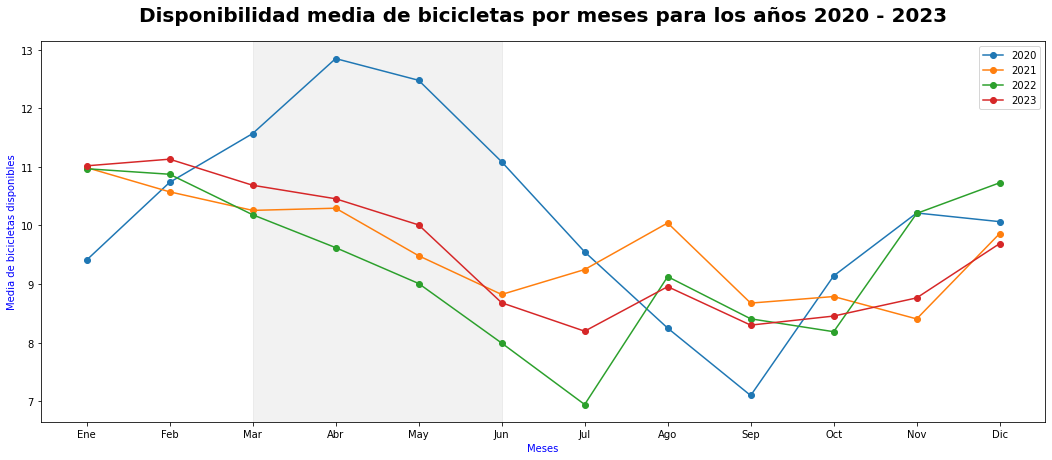

In [88]:
# Plotting
fig, ax = plt.subplots(figsize=(18, 7))

months = range(1, 13) 
avg_bikes_2020 = df_2020_monthly['num_bikes_available']
avg_bikes_2021 = df_2021_monthly['num_bikes_available']
avg_bikes_2022 = df_2022_monthly['num_bikes_available']
avg_bikes_2023 = df_2023_monthly['num_bikes_available']

# Crear la lineas de los plots
ax.plot(months, avg_bikes_2020, marker='o', label='2020')
ax.plot(months, avg_bikes_2021, marker='o', label='2021')
ax.plot(months, avg_bikes_2022, marker='o', label='2022')
ax.plot(months, avg_bikes_2023, marker='o', label='2023')

# Agregar titulos y etiquetas
ax.set_title('Disponibilidad media de bicicletas por meses para los años 2020 - 2023', fontsize=20, color='black', weight='bold' , pad=20)
ax.set_xlabel('Meses', color='blue')
ax.set_ylabel('Media de bicicletas disponibles', color='blue')
ax.legend()

ax.axvspan(3.0, 6.0, color='grey', alpha=0.1)

# Etiquetas para los meses

ax.set_xticks(months)
ax.set_xticklabels(meses)

plt.show()